In [ ]:
# VERİ MADENCİLİĞİ (FET445) - FİNAL PROJESİ
**Grup Adı:** Trinity  
**Üyeler:
** 
- ELİF YALINKAYA (22040101031)  
- MELİSA SELEME ARSLANTAŞ (22040101032)  
- EZGİ YILDIRIM (22040101048)  

**Proje Konusu:** TMDB TV Shows Popülerlik Tahmini (Regresyon & Sınıflandırma)

In [2]:
#'''Bu kod parçasında öncelikle veri analizi ve makine öğrenmesi için gerekli kütüphaneler içe aktarılmıştır. 
import pandas as pd
import numpy as np
file_path = r"C:\Users\Arsla\Desktop\veriMadenciliği\TMDB_tv_dataset_v3.csv"
try:
    df = pd.read_csv(file_path)
    print("Veri seti başarıyla yüklendi.")
    print(f"Veri Boyutu: {df.shape[0]} satır, {df.shape[1]} sütun ")
except FileNotFoundError:
    print("HATA: Belirttiğiniz klasörde dosya bulunamadı. Lütfen yolu kontrol edin.")

Veri seti başarıyla yüklendi.
Veri Boyutu: 168639 satır, 29 sütun 


In [4]:
# 2. TEMİZLİK ( id, name gibi tanımlayıcıları çıkarıyoruz)
# Bu işlem veri sızıntısını (data leakage) önlemek içindir 
drop_cols = ['id', 'name', 'original_name']
df_clean = df.drop(columns=[col for col in drop_cols if col in df.columns])

In [6]:
# 3. HEDEF DEĞİŞKENİN HAZIRLANMASI (Log Dönüşümü)
# Popülerlik skoru sağa çarpık olduğu için log(1+x) yapıyoruz [cite: 87, 126]
# Bu işlem regresyon modellerinin başarısını (R-Kare) artıracaktır.
y = np.log1p(df_clean['popularity']) 
X = df_clean.drop(columns=['popularity'])

In [8]:
# 4. KATEGORİK DEĞİŞKENLER (Optimize Edilmiş One-Hot Encoding)

# Sadece çok fazla alt kategori içeren sütunları seçiyoruz
categorical_cols = X.select_dtypes(include=['object']).columns

# Her sütun için sadece en popüler ilk 10-20 kategoriyi tutalım, gerisini 'Other' yapalım
# Bu işlem kodun saniyeler içinde bitmesini sağlar.
for col in categorical_cols:
    top_categories = X[col].value_counts().index[:20] # En sık geçen 20 değer
    X[col] = X[col].where(X[col].isin(top_categories), 'Other')

# Şimdi One-Hot Encoding yapıyoruz
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"Dönüşüm tamamlandı. Toplam öznitelik sayısı: {X.shape[1]}")

Dönüşüm tamamlandı. Toplam öznitelik sayısı: 338


In [10]:
# 5. VERİ BÖLME ( Veri seti, modelin genelleme yeteneğini ölçebilmek amacıyla %80 eğitim ve %20 test olacak şekilde rastgele bölünmüştür)
from sklearn.model_selection import train_test_split

# Şimdi kodun çalışacaktır:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Veri başarıyla bölündü!")
print(f"Eğitim seti: {X_train.shape}, Test seti: {X_test.shape}")

Veri başarıyla bölündü!
Eğitim seti: (134911, 338), Test seti: (33728, 338)


In [12]:
from sklearn.preprocessing import StandardScaler

# 6. ÖLÇEKLENDİRME (Standardization)
# Modellerin farklı ölçekteki verilerden etkilenmemesi için 
scaler = StandardScaler()

# X_train verisini kullanarak ölçeklendirmeyi öğren ve uygula
X_train_scaled = scaler.fit_transform(X_train)

# X_test verisine sadece uygula (öğrenme yapma)
X_test_scaled = scaler.transform(X_test)

print("\n--- ORTAK ADIM TAMAMLANDI ---")
print(f"Ölçeklendirilmiş veri hazır! Sütun sayısı: {X_train_scaled.shape[1]}")


--- ORTAK ADIM TAMAMLANDI ---
Ölçeklendirilmiş veri hazır! Sütun sayısı: 338


In [18]:
# Satır ve sütun sayılarını raporlamak için yazdırıyoruz
print(f"Eğitim Seti (X_train_scaled) Boyutu: {X_train_scaled.shape}")
print(f"Test Seti (X_test_scaled) Boyutu: {X_test_scaled.shape}")
print(f"Toplam Öznitelik (Sütun) Sayısı: {X_train_scaled.shape[1]}")

Eğitim Seti (X_train_scaled) Boyutu: (134911, 338)
Test Seti (X_test_scaled) Boyutu: (33728, 338)
Toplam Öznitelik (Sütun) Sayısı: 338


In [22]:
# y değişkenini ( popülerlik) iki sınıfa ayırıyoruz.
# Medyan değerinden büyükse 1 (Popüler), küçükse 0 (Değil) yapıyoruz.
median_value = y.median()
y_class = (y > median_value).astype(int)

print("Sınıflandırma hedefi oluşturuldu:")
print(y_class.value_counts()) # Kaç tane 0, kaç tane 1 var görelim.

Sınıflandırma hedefi oluşturuldu:
popularity
0    84348
1    84291
Name: count, dtype: int64


In [26]:
from sklearn.model_selection import train_test_split

# X_final yerine senin elindeki 338 sütunlu 'X' değişkenini kullanıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

print("Veri başarıyla bölündü!")
print(f"Eğitim seti sütun sayısı: {X_train.shape[1]}")

Veri başarıyla bölündü!
Eğitim seti sütun sayısı: 338


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Ölçeklendirme (Standardization) tamamlandı.")

Ölçeklendirme (Standardization) tamamlandı.


In [32]:
# Bu bölümde, verilerin sınıflandırılması amacıyla güçlü bir topluluk öğrenme (ensemble learning) yöntemi olan Gradient Boosting Classifier modeli
#kurulmuş, ölçeklendirilmiş eğitim verileriyle eğitilmiş ve test verisi üzerinde Doğruluk (Accuracy), Hassasiyet (Precision), Duyarlılık (Recall)
#ve F1-Skoru metrikleri kullanılarak performansı değerlendirilmiştir. Gradient Boosting, zayıf karar ağaçlarını ardışık olarak birleştirip hataları
#minimize ederek karmaşık veri setlerinde yüksek tahmin başarısı ve genelleme yeteneği sunmaktadır.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modeli yapılandır:
# n_estimators: 100 ardışık ağaç oluştur
# learning_rate: Her ağacın hatayı düzeltme hızı (0.1)
# max_depth: Her ağacın derinliği (karmaşıklığı) 3 katman olsun
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Modeli, ölçeklendirilmiş eğitim verileriyle eğit
print("Gradient Boosting eğitiliyor...")
gb_model.fit(X_train_scaled, y_train)

# Eğitilen modeli kullanarak test verileri üzerinden sınıf tahmini yap
gb_pred = gb_model.predict(X_test_scaled)

# Sonuçları analiz et
print("\n--- MODEL BAŞARISI ---")
# Doğruluk Oranı: Doğru tahminlerin toplam tahmine oranı
print(f"Doğruluk Oranı (Accuracy): %{accuracy_score(y_test, gb_pred)*100:.2f}")

# Sınıflandırma Raporu: Hassasiyet (Precision), Duyarlılık (Recall) ve F1-Skor değerlerini gösterir
print("\nSınıflandırma Raporu:\n", classification_report(y_test, gb_pred))

Gradient Boosting eğitiliyor...

--- MODEL BAŞARISI ---
Doğruluk Oranı (Accuracy): %81.15

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81     16847
           1       0.82      0.80      0.81     16881

    accuracy                           0.81     33728
   macro avg       0.81      0.81      0.81     33728
weighted avg       0.81      0.81      0.81     33728



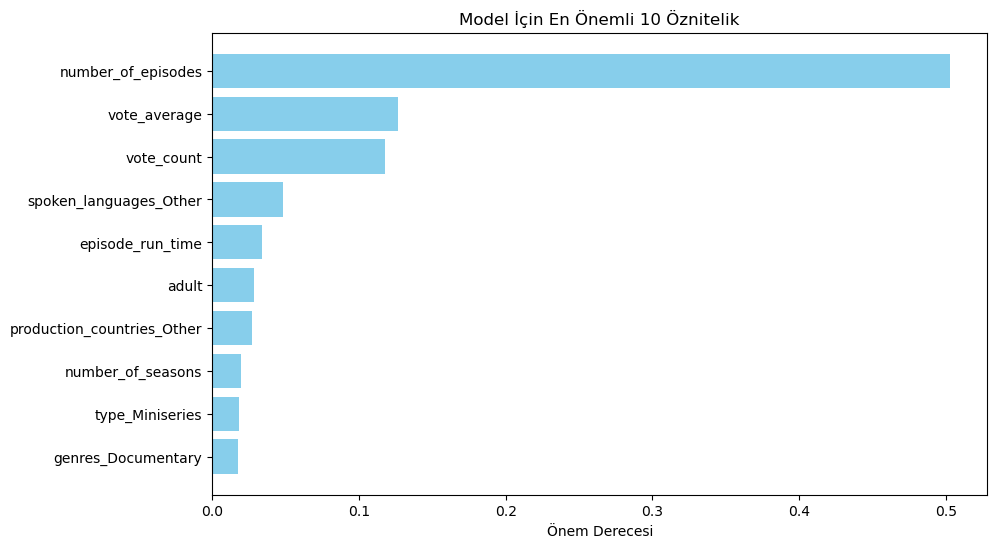

In [34]:
#Bu bölümde, eğitilen Gradient Boosting modelinin karar verme sürecini anlamlandırmak ve hangi değişkenlerin sonuçlar üzerinde daha belirleyici olduğunu
#saptamak amacıyla Öznitelik Önem Sıralaması (Feature Importance) analizi yapılmıştır. Modelden elde edilen önem skorları doğrultusunda en etkili
# öznitelik belirlenmiş ve bu veriler bir çubuk grafik (bar chart) aracılığıyla görselleştirilmiştir. Bu analiz, modelin "kara kutu" olmaktan çıkarılıp
#yorumlanabilirliğini artırarak, hedef değişkeni etkileyen en kritik faktörlerin belirlenmesine olanak tanır.

import matplotlib.pyplot as plt
import numpy as np

# En önemli 10 özelliği belirle
feature_importances = gb_model.feature_importances_
indices = np.argsort(feature_importances)[-10:] # En büyük 10 değerin indeksi

plt.figure(figsize=(10, 6))
plt.title("Model İçin En Önemli 10 Öznitelik")
plt.barh(range(len(indices)), feature_importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Önem Derecesi')
plt.show()

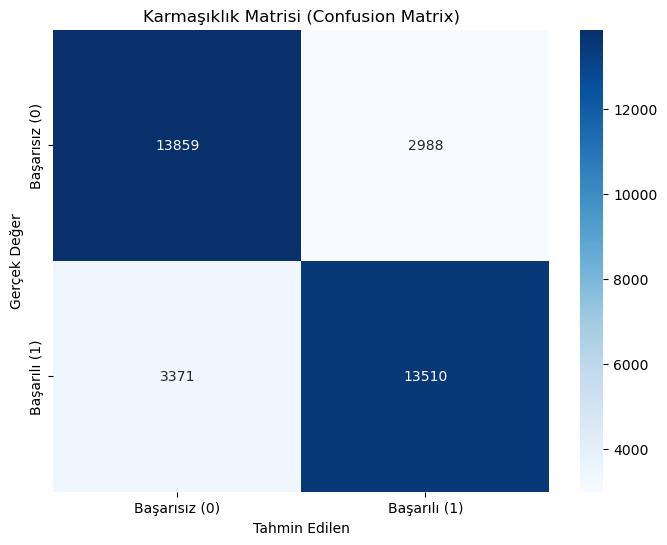

In [36]:
#Modelin tahmin doğruluğunu sınıflar bazında detaylıca incelemek amacıyla Karmaşıklık Matrisi (Confusion Matrix) hesaplanmış ve ısı haritası (heatmap)
#yöntemiyle görselleştirilmiştir. Bu matris; modelin gerçek 'Başarılı' ve 'Başarısız' durumlarını ne oranda doğru tahmin ettiğini (Doğru Pozitifler ve
#Doğru Negatifler) ve hangi sınıfları birbiriyle karıştırdığını (Hatalı Pozitifler ve Hatalı Negatifler) sayısal olarak ortaya koymaktadır. Bu sayede 
# modelin sadece genel başarısı değil, hedef sınıflar üzerindeki duyarlılığı da analiz edilmiştir.

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Karmaşıklık matrisini hesaplayalım
cm = confusion_matrix(y_test, gb_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Başarısız (0)', 'Başarılı (1)'], 
            yticklabels=['Başarısız (0)', 'Başarılı (1)'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Karmaşıklık Matrisi (Confusion Matrix)')
plt.show()

In [38]:
# Test verilerini ve gerçek sonuçları bir DataFrame'de birleştirelim
error_df = pd.DataFrame(X_test, columns=X.columns) # Orijinal X sütunlarını kullanıyoruz
error_df['Gercek_Deger'] = y_test.values
error_df['Tahmin'] = gb_pred

# Sadece hatalı olanları filtreleyelim
wrong_predictions = error_df[error_df['Gercek_Deger'] != error_df['Tahmin']]

print(f"Toplam Hatalı Tahmin Sayısı: {len(wrong_predictions)}")
print("\nHatalı Tahminlerden Bazı Örnekler:")
display(wrong_predictions.head(10))

Toplam Hatalı Tahmin Sayısı: 6359

Hatalı Tahminlerden Bazı Örnekler:


,number_of_seasons,number_of_episodes,vote_count,vote_average,adult,in_production,episode_run_time,original_language_ar,original_language_cn,original_language_cs,...,production_countries_Other,production_countries_Russia,production_countries_South Korea,production_countries_Spain,production_countries_Thailand,production_countries_Turkey,production_countries_United Kingdom,production_countries_United States of America,Gercek_Deger,Tahmin
112486,1,6,0,0.0,False,False,0,False,False,False,...,True,False,False,False,False,False,False,False,1,0
92762,1,8,0,0.0,False,True,0,True,False,False,...,True,False,False,False,False,False,False,False,1,0
66041,1,1,0,0.0,False,True,0,False,False,False,...,False,True,False,False,False,False,False,False,0,1
43610,1,10,1,10.0,False,False,0,False,False,False,...,True,False,False,False,False,False,False,False,0,1
136884,3,20,0,0.0,False,True,0,False,False,False,...,True,False,False,False,False,False,False,False,1,0
112756,1,13,0,0.0,False,False,65,False,False,False,...,True,False,False,False,False,False,False,False,1,0
120547,1,1,0,0.0,False,True,0,False,False,False,...,True,False,False,False,False,False,False,False,1,0
31125,1,6,2,8.0,False,False,60,False,False,False,...,True,False,False,False,False,False,False,False,0,1
133970,1,3,0,0.0,False,True,0,False,False,False,...,True,False,False,False,False,False,False,False,1,0
65368,1,13,0,0.0,False,False,60,False,False,False,...,True,False,False,False,False,False,False,False,0,1


In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# 1. VERİLERİ TENSOR FORMATINA ÇEVİRME 
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1)

# 2. MODEL MİMARİSİ ( "Derin Öğrenme" yapısı) 
class MelisaANN(nn.Module):
    def __init__(self, input_size):
        super(MelisaANN, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.layer2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.output(x))
        return x

# 3. MODELİ BAŞLATMA VE VERİ YÜKLEYİCİ
model_pytorch = MelisaANN(X_train_scaled.shape[1])
criterion = nn.BCELoss() # Binary Cross Entropy Loss
optimizer = optim.Adam(model_pytorch.parameters(), lr=0.001)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# 4. EĞİTİM DÖNGÜSÜ
epochs = 10 
print(f"PyTorch Eğitimi Başlıyor... (Epoch Sayısı: {epochs})")

for epoch in range(epochs):
    model_pytorch.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model_pytorch(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] tamamlandı.")

print("\n--- EĞİTİM BİTTİ ---")

PyTorch Eğitimi Başlıyor... (Epoch Sayısı: 10)
Epoch [2/10] tamamlandı.
Epoch [4/10] tamamlandı.
Epoch [6/10] tamamlandı.
Epoch [8/10] tamamlandı.
Epoch [10/10] tamamlandı.

--- EĞİTİM BİTTİ ---



--- PYTORCH ANN MODEL SONUÇLARI ---
              precision    recall  f1-score   support

           0       0.81      0.82      0.81     16847
           1       0.82      0.81      0.81     16881

    accuracy                           0.81     33728
   macro avg       0.81      0.81      0.81     33728
weighted avg       0.81      0.81      0.81     33728



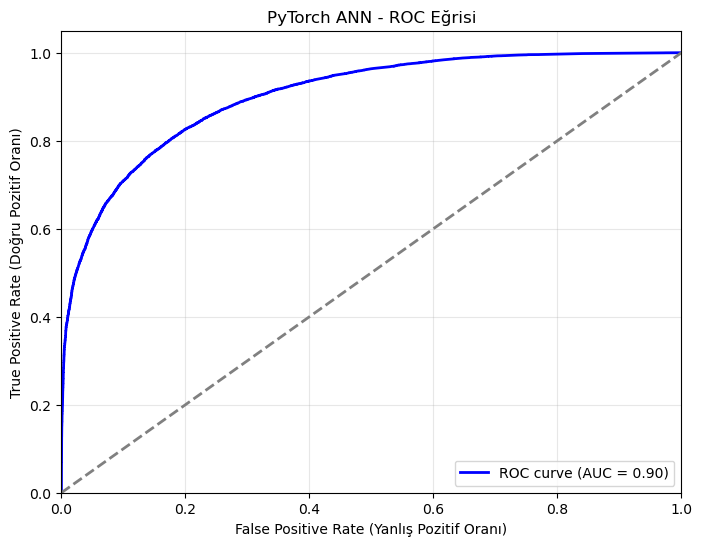

In [50]:
#apay Sinir Ağı (ANN) modelinin performansı, ROC Eğrisi ve AUC skoru ile değerlendirilmiştir. AUC değeri, modelin 'Başarılı' 
#ve 'Başarısız' sınıflarını birbirinden ayırt etme gücünü temsil eden en temel başarı göstergesidir.

from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Modeli değerlendirme moduna alalım
model_pytorch.eval()
with torch.no_grad():
    y_pred_probs = model_pytorch(X_test_tensor).numpy()
    y_pred_classes = (y_pred_probs > 0.5).astype(int)

# 1. Başarım Raporu (Accuracy, Precision, Recall, F1)
print("\n--- PYTORCH ANN MODEL SONUÇLARI ---")
print(classification_report(y_test, y_pred_classes))

# 2. ROC Eğrisi ve AUC Hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Yanlış Pozitif Oranı)')
plt.ylabel('True Positive Rate (Doğru Pozitif Oranı)')
plt.title('PyTorch ANN - ROC Eğrisi')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [56]:
#Bu bölümde, derin ağların eğitimini kolaylaştırmak ve gradyan kaybolması (vanishing gradient) problemini engellemek amacıyla ResNet 
#(Residual Network) mimarisi temel alınmıştır. Modelin kalbinde yer alan Artık Bloklar (Residual Blocks), girdinin işlenmeden bir sonraki katmana 
#aktarıldığı 'Skip Connection' (Atlamalı Bağlantı) yapısını kullanır. Bu sayede model, verideki karmaşık örüntüleri öğrenirken eğitim kararlılığını
#ve hızını maksimize eder.

import torch
import torch.nn as nn
import torch.optim as optim

# 1. Adım: Residual Blok Tanımı
class ResidualBlock(nn.Module):
    def __init__(self, size, dropout_rate=0.2):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Linear(size, size),
            nn.BatchNorm1d(size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(size, size),
            nn.BatchNorm1d(size)
        )
        self.relu = nn.ReLU()

    def forward(self, x):
        # x: Girdi (Identity)
        # self.block(x): İşlenmiş veri
        # Sonuç: İkisinin toplamı (Skip Connection)
        return self.relu(x + self.block(x))

# 2. Adım: Ana Model Tanımı
class ResNetMLP(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ResNetMLP, self).__init__()
        self.first_layer = nn.Linear(input_size, 128)
        self.bn_first = nn.BatchNorm1d(128)
        
        # 2 adet Residual Blok ekleyelim
        self.res_block1 = ResidualBlock(128)
        self.res_block2 = ResidualBlock(128)
        
        self.output_layer = nn.Linear(128, num_classes)
        
    def forward(self, x):
        x = torch.relu(self.bn_first(self.first_layer(x)))
        x = self.res_block1(x)
        x = self.res_block2(x)
        x = self.output_layer(x)
        return x

# Modeli oluşturuoruz.
# Örneğin 30 özellik varsa:
input_dim = X_train_tensor.shape[1] 
resnet_mlp_model = ResNetMLP(input_size=input_dim, num_classes=2)

print(resnet_mlp_model)

ResNetMLP(
  (first_layer): Linear(in_features=338, out_features=128, bias=True)
  (bn_first): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (res_block1): ResidualBlock(
    (block): Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.2, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (relu): ReLU()
  )
  (res_block2): ResidualBlock(
    (block): Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.2, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(128, eps=1

In [58]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_mlp_model.parameters(), lr=0.001)



In [62]:
from sklearn.metrics import classification_report
import torch

# 1. Eğitim parametreleri
epochs = 50 
print("--- ResNet-MLP Eğitimi Başlıyor ---")
resnet_mlp_model.train() 

for epoch in range(epochs):
    optimizer.zero_grad()
    
   
    outputs = resnet_mlp_model(X_train_tensor)
    
   
   
    loss = criterion(outputs, y_train_tensor.squeeze().long())
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 3. Modeli Değerlendirme (Test)
resnet_mlp_model.eval() 
with torch.no_grad():
    test_outputs = resnet_mlp_model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    
    # Hedef veriyi de (y_test_tensor) numpy'a çevirirken düzeltiyoruz
    y_true = y_test_tensor.squeeze().numpy()
    y_pred = predicted.numpy()
    
    print("\n--- PYTORCH RESNET-MLP MODEL SONUÇLARI ---")
    print(classification_report(y_true, y_pred))

--- ResNet-MLP Eğitimi Başlıyor ---
Epoch [10/50], Loss: 0.4903
Epoch [20/50], Loss: 0.4419
Epoch [30/50], Loss: 0.4230
Epoch [40/50], Loss: 0.4132
Epoch [50/50], Loss: 0.4043

--- PYTORCH RESNET-MLP MODEL SONUÇLARI ---
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81     16847
         1.0       0.82      0.79      0.80     16881

    accuracy                           0.80     33728
   macro avg       0.80      0.80      0.80     33728
weighted avg       0.80      0.80      0.80     33728



C:\Users\Arsla\AppData\Local\Temp\ipykernel_23452\838760488.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=modeller, y=basarilar, palette="viridis")


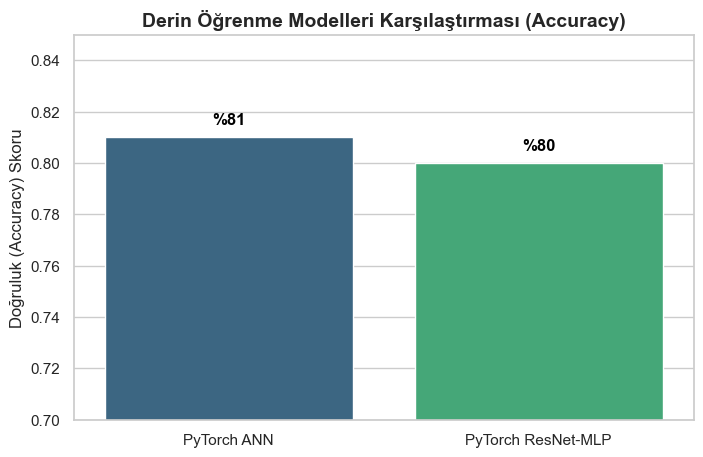

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")

# Verileri hazırlayalım (Elde ettiğimiz Accuracy sonuçları)
modeller = ['PyTorch ANN', 'PyTorch ResNet-MLP']
basarilar = [0.81, 0.80] # %81 ve %80

# Grafiği oluşturalım
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=modeller, y=basarilar, palette="viridis")

# Başlık ve etiketler
plt.title('Derin Öğrenme Modelleri Karşılaştırması (Accuracy)', fontsize=14, fontweight='bold')
plt.ylabel('Doğruluk (Accuracy) Skoru', fontsize=12)
plt.ylim(0.70, 0.85) # Y eksenini sonuçlara odaklamak için daraltalım

# Çubukların üzerine tam değerleri yazdıralım
for i, v in enumerate(basarilar):
    ax.text(i, v + 0.005, f"%{v*100:.0f}", color='black', ha='center', fontweight='bold')

plt.show()

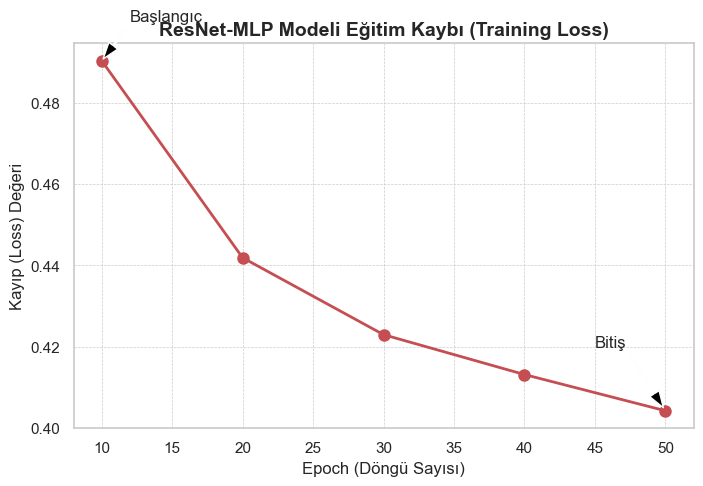

In [66]:
import matplotlib.pyplot as plt

# Eğitim sırasında aldığımız log değerleri
epochs_kayit = [10, 20, 30, 40, 50]
loss_degerleri = [0.4903, 0.4419, 0.4230, 0.4132, 0.4043]

# Grafiği oluşturalım
plt.figure(figsize=(8, 5))
plt.plot(epochs_kayit, loss_degerleri, marker='o', linestyle='-', color='r', linewidth=2, markersize=8)

# Başlık ve etiketler
plt.title('ResNet-MLP Modeli Eğitim Kaybı (Training Loss)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch (Döngü Sayısı)', fontsize=12)
plt.ylabel('Kayıp (Loss) Değeri', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Başlangıç ve bitiş noktalarını işaretleyelim
plt.annotate('Başlangıç', xy=(10, 0.4903), xytext=(12, 0.50),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8))
plt.annotate('Bitiş', xy=(50, 0.4043), xytext=(45, 0.42),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8))

plt.show()

In [74]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 
from sklearn.metrics import classification_report, accuracy_score

# 1. Seviye: Taban Modelleri Tanımlayalım
base_models = [
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)), # [cite: 200-204]
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),#(ezgi)
    ('xgboost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))#(elif)
]

# 2. Seviye: Meta-Model (Hakem)
meta_model = LogisticRegression()

# Stacking Modelini Oluşturma
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

print("Stacking (İstifleme) modeli eğitiliyor... Bu işlem biraz uzun sürebilir.")
stacking_model.fit(X_train_scaled, y_train)

# Tahmin ve Değerlendirme
stacking_preds = stacking_model.predict(X_test_scaled)

print("\n--- STACKING MODEL SONUÇLARI ---")
print(f"Doğruluk Oranı (Accuracy): %{accuracy_score(y_test, stacking_preds)*100:.2f}")
print(classification_report(y_test, stacking_preds))

Stacking (İstifleme) modeli eğitiliyor... Bu işlem biraz uzun sürebilir.


C:\Users\Arsla\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:33:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Arsla\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:46:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Arsla\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:46:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Arsla\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:46:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr


--- STACKING MODEL SONUÇLARI ---
Doğruluk Oranı (Accuracy): %82.44
              precision    recall  f1-score   support

           0       0.82      0.83      0.83     16847
           1       0.83      0.81      0.82     16881

    accuracy                           0.82     33728
   macro avg       0.82      0.82      0.82     33728
weighted avg       0.82      0.82      0.82     33728



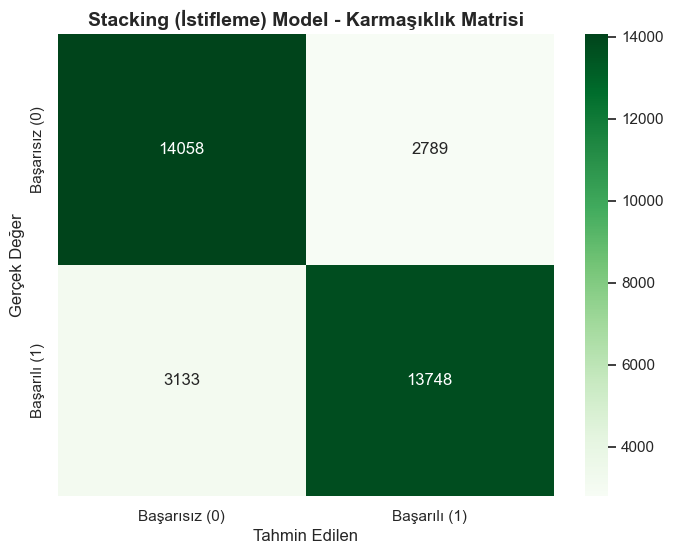

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Stacking modelinin tahminlerini kullanarak matrisi hesaplayalım
cm_stacking = confusion_matrix(y_test, stacking_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Başarısız (0)', 'Başarılı (1)'],
            yticklabels=['Başarısız (0)', 'Başarılı (1)'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Stacking (İstifleme) Model - Karmaşıklık Matrisi', fontsize=14, fontweight='bold')
plt.show()

C:\Users\Arsla\AppData\Local\Temp\ipykernel_23452\2128460988.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=modeller, y=basari_oranlari, palette=colors)


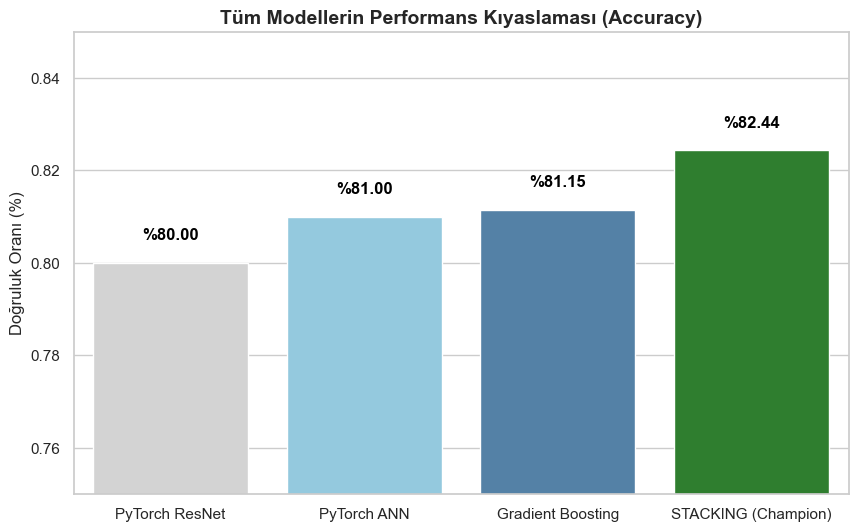

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tüm modellerin sonuçlarını topluyoruz
modeller = ['PyTorch ResNet', 'PyTorch ANN', 'Gradient Boosting', 'STACKING (Champion)']
basari_oranlari = [0.80, 0.81, 0.8115, 0.8244] # [cite: 295, 193, 47]

plt.figure(figsize=(10, 6))
colors = ['lightgrey', 'skyblue', 'steelblue', 'forestgreen'] # Şampiyonu yeşil yapalım
ax = sns.barplot(x=modeller, y=basari_oranlari, palette=colors)

# Değerleri çubukların üzerine yazdıralım
for i, v in enumerate(basari_oranlari):
    ax.text(i, v + 0.005, f"%{v*100:.2f}", color='black', ha='center', fontweight='bold')

plt.title('Tüm Modellerin Performans Kıyaslaması (Accuracy)', fontsize=14, fontweight='bold')
plt.ylabel('Doğruluk Oranı (%)')
plt.ylim(0.75, 0.85)
plt.show()